# **Domain Proyek**
Pada setiap pergantian semester, terdapat mahasiswa yang harus keluar dari kampus atau tidak lulus mata kuliah tertentu. Untuk mengatasi permasalahan ini, dikembangkan sebuah model prediksi yang dapat memperkirakan hasil akhir nilai ujian mahasiswa. Dengan adanya model ini, mahasiswa yang diprediksi tidak lulus dapat memperoleh intervensi sejak dini.

Berdasarkan artikel dari [Departement of Communications UII](https://communication.uii.ac.id/beragam-alasan-mahasiswa-tidak-lulus-lulus-bagaimana-mengantisipasinya/) kasus DO di indonesia ada 601.333 mahasiswa putus kuliah.

Diharapkan bahwa langkah ini dapat membantu mengurangi jumlah mahasiswa yang harus mengulang mata kuliah di semester berikutnya. Model prediksi ini akan menggunakan berbagai faktor yang memengaruhi nilai ujian sebagai dasar analisis untuk memprediksi performa akademik mahasiswa.

# **Business Understanding**

## **Problem Statement dan Goals**
Setiap semester, ratusan ribu mahasiswa di Indonesia tidak lulus mata kuliah atau bahkan mengalami putus kuliah (DO) akibat ketidaktahuan terhadap risiko akademik yang dihadapi. Sistem kampus saat ini masih memiliki keterbatasan dalam mengidentifikasi mahasiswa berisiko gagal secara real-time dan memberikan intervensi dini. Akibatnya, banyak mahasiswa baru menyadari ketidaklulusan setelah proses evaluasi akhir, yang berpotensi meningkatkan beban akademik dan finansial serta menurunkan motivasi belajar.

Untuk mengatasi permasalahan tersebut, dikembangkan sebuah model machine learning dengan tujuan:

* Memprediksi hasil akhir nilai ujian mahasiswa dengan akurasi tinggi berdasarkan faktor-faktor yang memengaruhi performa akademik.

* Mengidentifikasi faktor dominan (misalnya: kehadiran, nilai tugas, partisipasi kelas) yang memiliki korelasi signifikan dengan ketidaklulusan.

## **Metodologi**
Karena nilai ujian akhir yang diprediksi bersifat kontinu, model regresi akan digunakan untuk memprediksi hasil ujian setiap mahasiswa. Beberapa algoritma regresi yang akan diterapkan meliputi:
* Linear Regression, algoritma dasar untuk regresi yang mudah diinterpretasi dan cocok untuk baseline model/
* Decision Tree Regressor, karena algoritma ini dapat menangani hubungan non-linear dan interaksi antar fitur dan mudah diinterpretasi tetapi rentan overfitting.
* Random Forest Regressor, untuk mengatasi masalah dari algoritma decission tree, algoritma random forrest bisa mengurangi resiko overfitting.

## **Metrik**
Metrik yang akan di gunakan adalah MAE dan MSE





# **Data Understanding**
Dataset ini memberikan gambaran menyeluruh tentang berbagai faktor yang mempengaruhi kinerja siswa dalam ujian. Data ini mencakup informasi mengenai kebiasaan belajar, kehadiran, keterlibatan orang tua, dan aspek-aspek lain yang memengaruhi keberhasilan akademik. Sumber dataset: [Kaggle](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors). Dataset ini terdiri dari 20 fitur dan 6607 baris dengan kondisi dataset terbilang cukup bersih.

**Variabel-variabel pada Student Performance Factor dataset adalah sebagai berikut:**


* Hours_Studied: Jumlah jam belajar per minggu.

* Attendance: Persentase kehadiran di kelas.

* Parental_Involvement: Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi).

* Access_to_Resources: Ketersediaan sumber daya pendidikan (Rendah, Sedang, Tinggi).

* Extracurricular_Activities: Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak).

* Sleep_Hours: Rata-rata jam tidur per malam.

* Previous_Scores: Nilai dari ujian sebelumnya.

* Motivation_Level: Tingkat motivasi siswa (Rendah, Sedang, Tinggi).

* Internet_Access: Ketersediaan akses internet (Ya, Tidak).

* Tutoring_Sessions: Jumlah sesi bimbingan belajar yang dihadiri per bulan.

* Family_Income: Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi).

* Teacher_Quality: Kualitas guru (Rendah, Sedang, Tinggi).

* School_Type: Jenis sekolah yang dihadiri (Negeri, Swasta).

* Peer_Influence: Pengaruh teman sebaya terhadap performa akademik (Positif, Netral, Negatif).

* Physical_Activity: Rata-rata jam aktivitas fisik per minggu.

* Learning_Disabilities: Adanya gangguan belajar (Ya, Tidak).

* Parental_Education_Level: Tingkat pendidikan tertinggi orang tua (SMA, Perguruan Tinggi, Pascasarjana).

* Distance_from_Home: Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh).

* Gender: Jenis kelamin siswa (Laki-laki, Perempuan).

* Exam_Score: Nilai ujian akhir.

Langkah pertama dalam pemrosesan data adalah mengunduh dataset dari tautan yang telah disediakan. Sebelum itu, diperlukan pengunggahan file JSON dari Kaggle untuk mengakses API Kaggle.

In [ ]:
# Pertama, install package kaggle
!pip install kaggle

# Upload file kaggle.json Anda (dapatkan dari profil Kaggle Anda)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrmighdadjaba","key":"d55b3146f89f8d6fb5f406ce50ff2688"}'}

In [ ]:
# Unduh dataset
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 107MB/s]


Setelah dataset berhasil diunduh, perlu dilakukan ekstraksi karena masih dalam format .zip.

In [ ]:
# Unzip dataset
import zipfile
with zipfile.ZipFile('student-performance-factors.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

## **Menangani Missing Value dan Outliers**

Selanjutnya, dilakukan pengecekan terhadap dataset untuk mengidentifikasi adanya missing values, data tidak valid, atau outliers guna mempermudah proses visualisasi.

In [ ]:
import pandas as pd

StudentPerformanceFactors = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
StudentPerformanceFactors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# 1. Cek Missing Value
print("Missing Values:")
print(StudentPerformanceFactors.isnull().sum())

Missing Values:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Hasil pengecekan menunjukkan bahwa beberapa fitur memiliki missing values atau data yang hilang. Karena jumlahnya relatif kecil, keputusan yang diambil adalah menghapus data yang mengandung missing values.

In [ ]:
StudentPerformanceFactors = StudentPerformanceFactors.dropna()

In [ ]:
StudentPerformanceFactors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

Langkah selanjutnya adalah mengecek keberadaan data tidak valid pada fitur numerik.

Perhatikan pada bagian code dibwh ini:

```
# valid_ranges = {
    'Hours_Studied': (0, 168),  # Maksimal 24x7 jam
    'Attendance': (0, 100),     # Persentase
    'Sleep_Hours': (0, 24),     # Jam tidur harian
    'Previous_Scores': (0, 100),# Nilai ujian
    'Tutoring_Sessions': (0, 31),# Maksimal 1x sehari
    'Physical_Activity': (0, 168) # Jam per minggu
}
```
Code diatas merupakan batas valid dari fitur numerik. Berikut adalah alasan setiap fitur di beri batas valid:
* Hours_Studied: (0, 168)

  Fitur ini merupakan jumlah jam belajar per minggu. Nilai yang diluar rentang ini di anggap tidak valid karena tidak mungkin secara logis. **Contoh**: jumlah jam belajar per minggu adalah 169. Ini adalah tidak logis, karena dalam seminggu hanya ada 168 jam

* Attendance: (0, 100)

  Nilai di luar rentang ini tidak memiliki makna dalam konteks persentase.

* Sleep_Hours: (0, 24)

  Batas maksimum jam tidur dalam sehari adalah 24 jam (satu hari penuh). Nilai 0 mungkin menandakan data error (karena manusia tetap butuh tidur minimal 1-2 jam).

* Previous_Scores: (0, 100)

  Nilai ujian biasanya dalam skala 0-100. Nilai di atas 100 atau negatif tidak valid dalam sistem penilaian standar.

* Tutoring_Sessions: (0, 31)

  Jumlah maksimum sesi bimbingan dalam sebulan = 31 (asumsi 1 sesi/hari di bulan dengan 31 hari).Nilai negatif tidak mungkin karena merepresentasikan jumlah sesi.

* Physical_Activity: (0, 168)

  Sama seperti Hours_Studied: 168 jam = total jam dalam seminggu. Nilai 168 berarti aktivitas fisik dilakukan 24 jam non-stop (tidak realistis, tetapi tetap dipertahankan sebagai batas teknis).



In [ ]:
# Validasi Data Numerik
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

# Batas valid untuk setiap kolom numerik
valid_ranges = {
    'Hours_Studied': (0, 168),  # Maksimal 24x7 jam
    'Attendance': (0, 100),     # Persentase
    'Sleep_Hours': (0, 24),     # Jam tidur harian
    'Previous_Scores': (0, 100),# Nilai ujian
    'Tutoring_Sessions': (0, 31),# Maksimal 1x sehari
    'Physical_Activity': (0, 168) # Jam per minggu
}

# Cek data tidak valid
print("\nInvalid Data:")
for col, (min_val, max_val) in valid_ranges.items():
    invalid = StudentPerformanceFactors[(StudentPerformanceFactors[col] < min_val) | (StudentPerformanceFactors[col] > max_val)]
    if not invalid.empty:
        print(f"{col}: {len(invalid)} data tidak valid")
        print(f"  Nilai ekstrim: Min {invalid[col].min()} - Max {invalid[col].max()}")


Invalid Data:


Hasil menunjukkan tidak ada data yang tidak valid.

Selanjutnya, dilakukan analisis terhadap keberadaan outliers dalam dataset menggunakan boxplot.

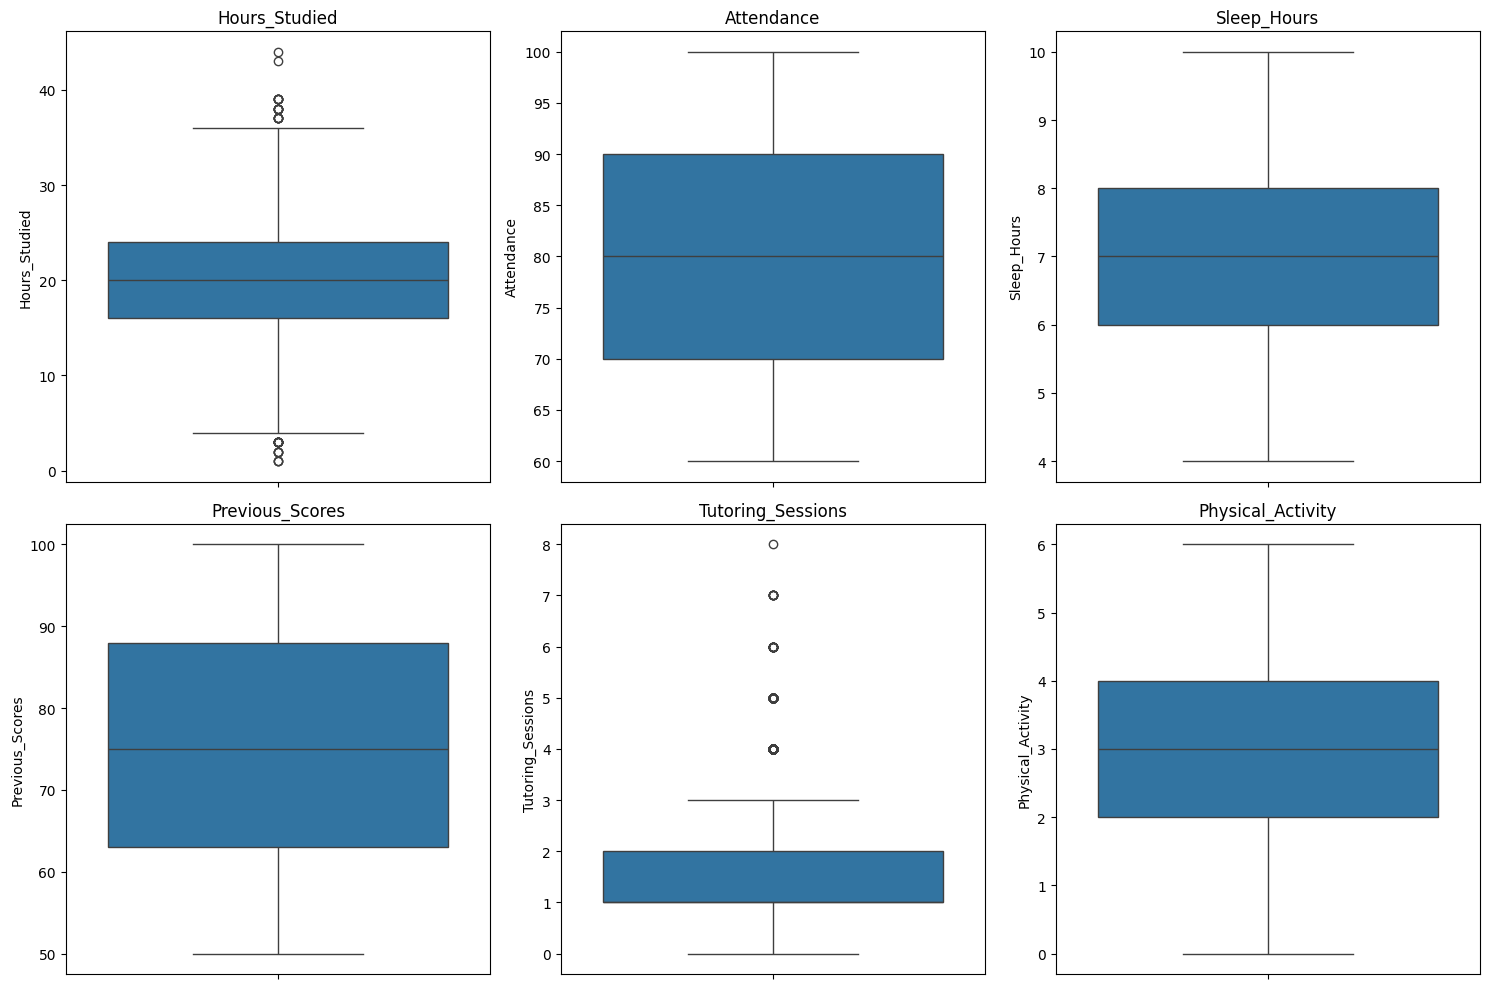

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot untuk Deteksi Outlier
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=StudentPerformanceFactors[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Lalu menangani outliers dengan menggunakan metode IQR. IQR adalah singkatan dari Inter Quartile Range. Inter Quartile Range (IQR) adalah salah satu prosedur yang paling banyak digunakan untuk deteksi dan penghapusan outlier. Hal ini dapat diterapkan dengan menemukan kuartil pertama dan ketiga (Q1 dan Q3) kemudian menghitung nilai IQRnya dengan mengurangi Q3 dan Q1.

Nilai outlier ini di ganti menjadi boundary.

In [ ]:
# 4. Penanganan Outlier
def handle_outliers(df, column):
    q1 = StudentPerformanceFactors[column].quantile(0.25)
    q3 = StudentPerformanceFactors[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Ganti outlier dengan nilai boundary
    StudentPerformanceFactors[column] = StudentPerformanceFactors[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Terapkan ke semua kolom numerik
for col in numeric_columns:
    df = handle_outliers(StudentPerformanceFactors, col)

Hasil setelah penanganan outlier

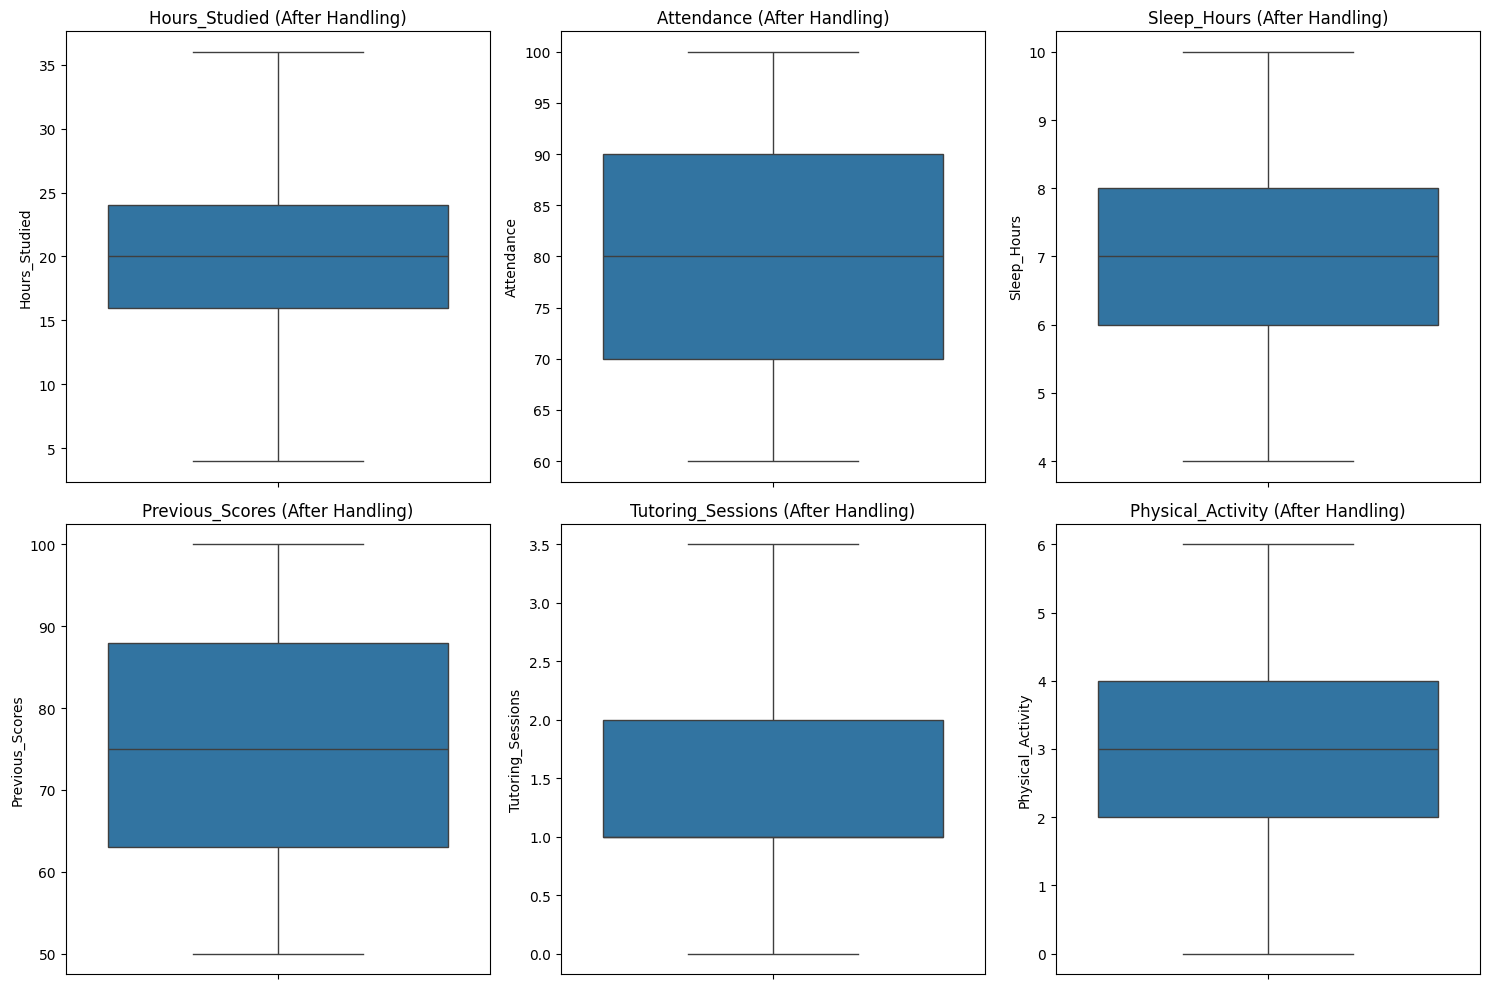

In [ ]:
# Verifikasi hasil setelah penanganan
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=StudentPerformanceFactors[col])
    plt.title(f'{col} (After Handling)')
plt.tight_layout()
plt.show()

## **Exploratory Data Analysis - Univariate Analysis**

Untuk analisis lebih lanjut, fitur numerik dan kategorikal perlu dipisahkan. Karena fitur numerik telah dipisahkan sebelumnya, maka tahap berikutnya adalah memisahkan fitur kategorikal.

In [ ]:
categorical_cols = ['Parental_Involvement', 'Extracurricular_Activities', 'Motivation_Level',
                   'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
                   'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                   'Distance_from_Home', 'Gender', 'Access_to_Resources']

Agar proses analisis lebih efisien, dibuat sebuah fungsi yang dapat digunakan berulang kali pada fitur kategorikal.

In [ ]:
def analyze_categorical_feature(df, feature):
    """
    Menampilkan analisis fitur kategorikal yang terdiri dari:
    - Tabel jumlah sampel dan persentase
    - Visualisasi bar plot

    Parameter:
    df (DataFrame): DataFrame yang digunakan
    feature (str): Nama kolom fitur kategorikal yang ingin dianalisis
    """
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    df_result = pd.DataFrame({
        'jumlah sampel': count,
        'persentase': percent.round(1)
    })

    print(f"Analisis untuk fitur: {feature}")
    print(df_result)

    count.plot(kind='bar', title=feature)
    plt.show()  # Untuk memastikan plot ditampilkan jika menggunakan environment non-interaktif

### **Categorical Features**

#### **Fitur Parental_Involvement**

Analisis untuk fitur: Parental_Involvement
                      jumlah sampel  persentase
Parental_Involvement                           
Medium                         3251        51.0
High                           1836        28.8
Low                            1291        20.2


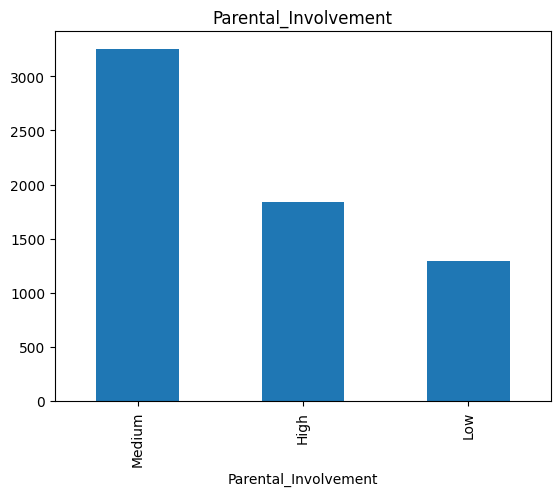

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[0])

Terdapat tiga kategori tingkat keterlibatan orang tua dalam pendidikan siswa (Parental Involvement), yaitu medium, high, dan low. Berdasarkan data persentase, dapat disimpulkan bahwa 50% keterlibatan orang tua (Parental Involvement) termasuk dalam kategori medium. Hal ini menunjukkan bahwa setengah dari siswa mendapatkan perhatian dalam proses perkuliahan.

#### **Fitur Extracurricular_Activities**

Analisis untuk fitur: Extracurricular_Activities
                            jumlah sampel  persentase
Extracurricular_Activities                           
Yes                                  3807        59.7
No                                   2571        40.3


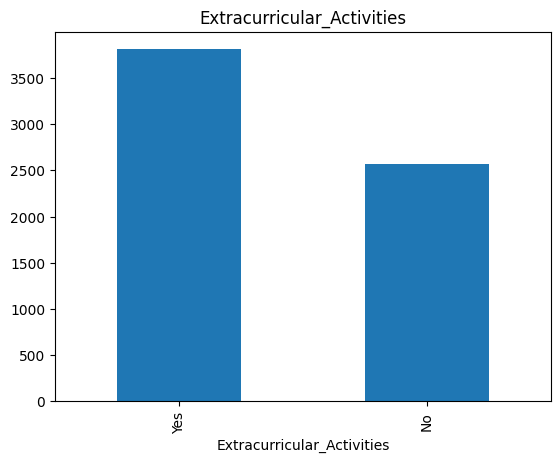

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[1])

Dari hasil persentase diatas, 59% mahasiswa memiliki aktivitas ekstrakurikuler.

#### **Fitur Motivation_Level**

Analisis untuk fitur: Motivation_Level
                  jumlah sampel  persentase
Motivation_Level                           
Medium                     3237        50.8
Low                        1864        29.2
High                       1277        20.0


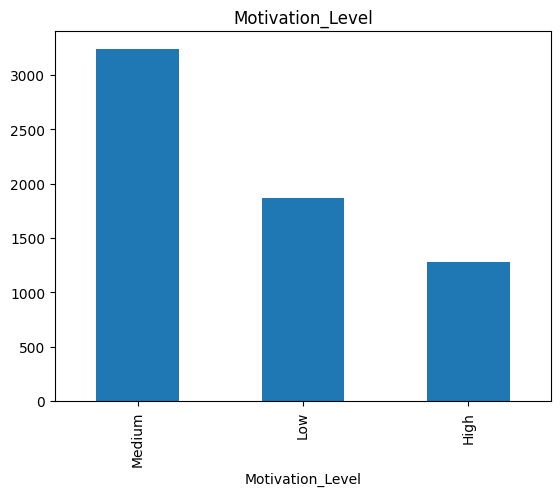

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[2])

Dari hasil tabel diatas, level motivasi di dominasi oleh medium yang memiliki persante 50% dari 2 level motivasi lainnya, seperti low dan medium

#### **Fitur Internet_Access**

Analisis untuk fitur: Internet_Access
                 jumlah sampel  persentase
Internet_Access                           
Yes                       5893        92.4
No                         485         7.6


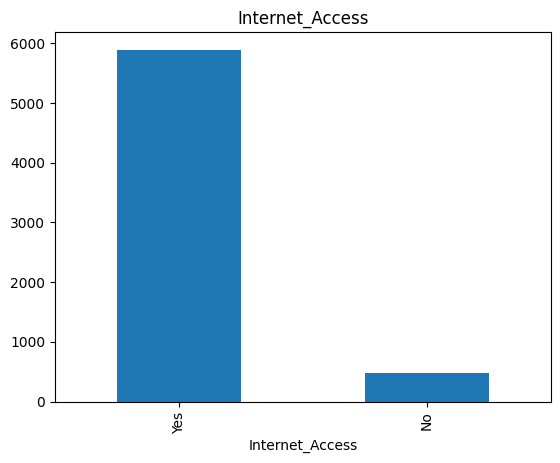

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[3])

Hasil dari visualisasi diatas menunjukkan bahwa hampir semua mahasiswa memiliki akses ke internet.

#### **Fitur Family_Income**

Analisis untuk fitur: Family_Income
               jumlah sampel  persentase
Family_Income                           
Low                     2582        40.5
Medium                  2566        40.2
High                    1230        19.3


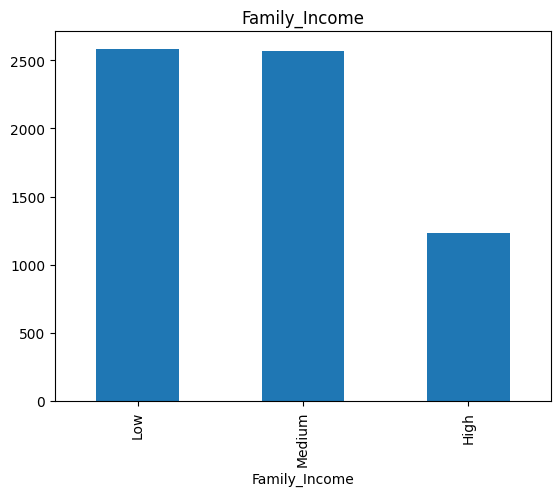

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[4])

Dari tabel di atas, kita dapat melihat bahwa persentase mahasiswa dengan pendapatan keluarga tinggi hanya sedikit, yaitu 19%, sedangkan sisanya berada pada kategori medium dan low

#### **Fitur Teacher_Quality**

Analisis untuk fitur: Teacher_Quality
                 jumlah sampel  persentase
Teacher_Quality                           
Medium                    3826        60.0
High                      1905        29.9
Low                        647        10.1


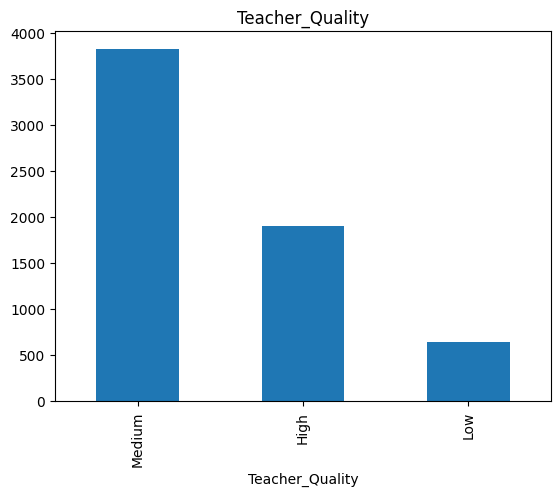

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[5])

Disini kita bisa melihat, bahwa kealitas dari dosen/pengajar murid berkualitas tinggi.

#### **Fitur School_Type**

Analisis untuk fitur: School_Type
             jumlah sampel  persentase
School_Type                           
Public                4434        69.5
Private               1944        30.5


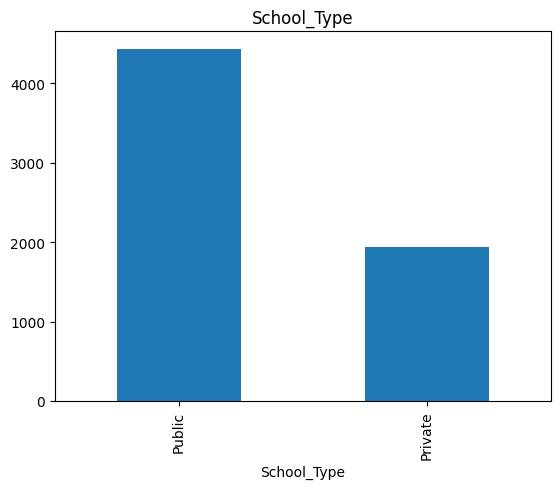

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[6])

Dari hasil visualisasi diatas menunjukkan sekolah public (negeri) lebih banyak di bandingkan private (swasta)

#### **Fitur Peer_Influence**

Analisis untuk fitur: Peer_Influence
                jumlah sampel  persentase
Peer_Influence                           
Positive                 2553        40.0
Neutral                  2495        39.1
Negative                 1330        20.9


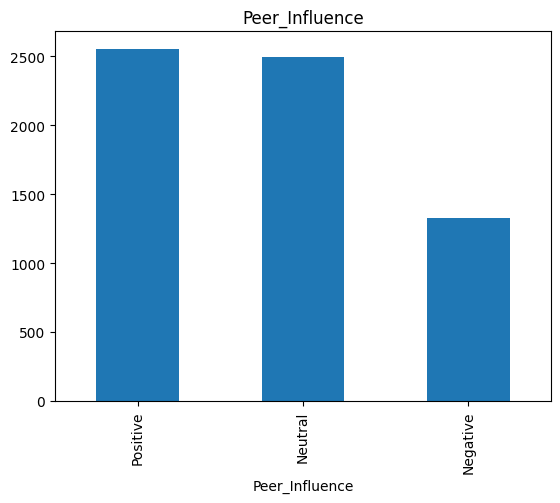

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[7])

Pengaruh teman sebaya cenderung didominasi oleh pengaruh positif dan netral, dengan persentase yang hampir seimbang (40.0% vs 39.1%). Namun, masih ada sebagian signifikan (20.9%) yang mengalami pengaruh negatif. Hal ini menunjukkan bahwa peer influence memiliki dampak beragam, dengan kecenderungan lebih ke arah positif/netral.

#### **Fitur Learning_Disabilities**

Analisis untuk fitur: Learning_Disabilities
                       jumlah sampel  persentase
Learning_Disabilities                           
No                              5710        89.5
Yes                              668        10.5


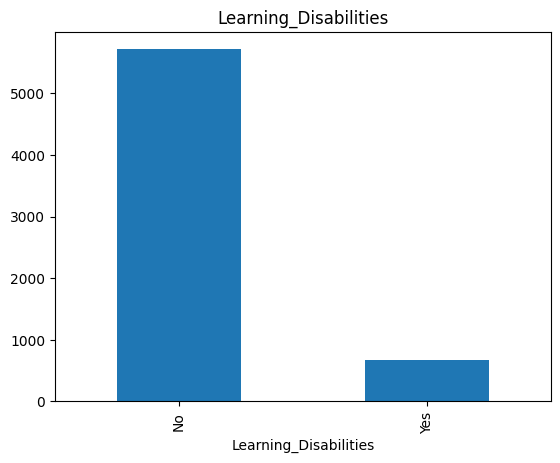

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[8])

Ini menunjukkan sebagian besar mahasiswa tidak mengalami gangguan belajar

#### **Fitur Parental_Education_Level**

Analisis untuk fitur: Parental_Education_Level
                          jumlah sampel  persentase
Parental_Education_Level                           
High School                        3159        49.5
College                            1939        30.4
Postgraduate                       1280        20.1


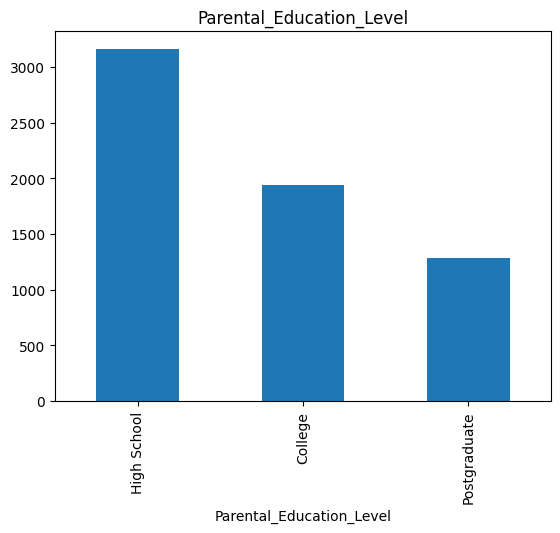

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[9])

Hasil dari analisis diatas menunjukkan 50% pendidikan terakhir orang tua mahasiswa adalah SMA atau high school

#### **Fitur Distance_from_Home**

Analisis untuk fitur: Distance_from_Home
                    jumlah sampel  persentase
Distance_from_Home                           
Near                         3801        59.6
Moderate                     1941        30.4
Far                           636        10.0


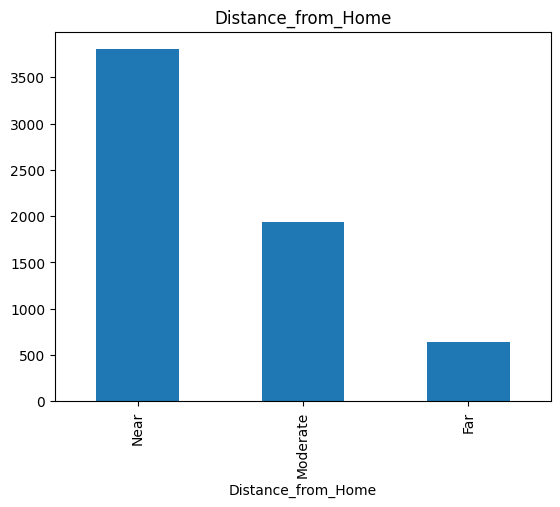

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[10])

hasil diatas menunjukkan 59% mahasiswa memiliki jarak antar rumah ke sekolah yang dekat.

#### **Fitur Gender**

Analisis untuk fitur: Gender
        jumlah sampel  persentase
Gender                           
Male             3688        57.8
Female           2690        42.2


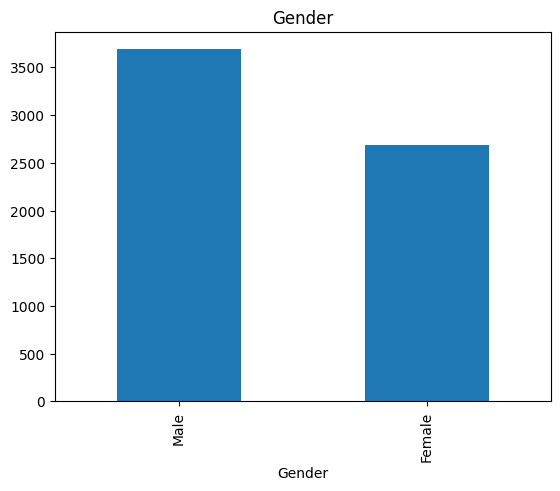

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[11])

hasil diatas menunjukkan jumlah siswa laki laki dan perempuan seimbang dimana siswa laki-laki 58% dan perempuan 42%

#### **Fitur Access_to_Resources**

Analisis untuk fitur: Access_to_Resources
                     jumlah sampel  persentase
Access_to_Resources                           
Medium                        3204        50.2
High                          1900        29.8
Low                           1274        20.0


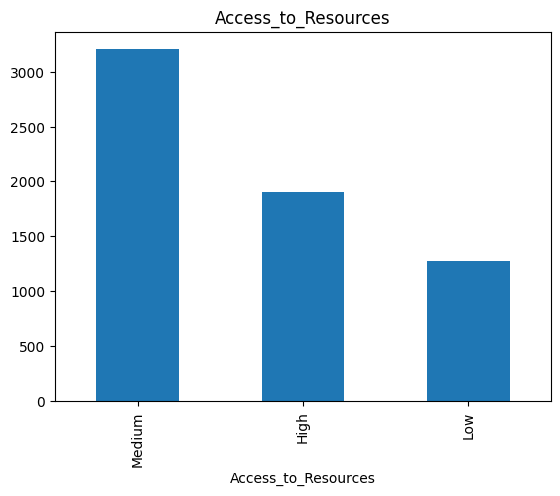

In [ ]:
analyze_categorical_feature(StudentPerformanceFactors, categorical_cols[12])

Grafik diatas menunjukkan 80% siswa memiliki ketersediaan sumber daya pendidikan yang memadai

### **Numerik Features**

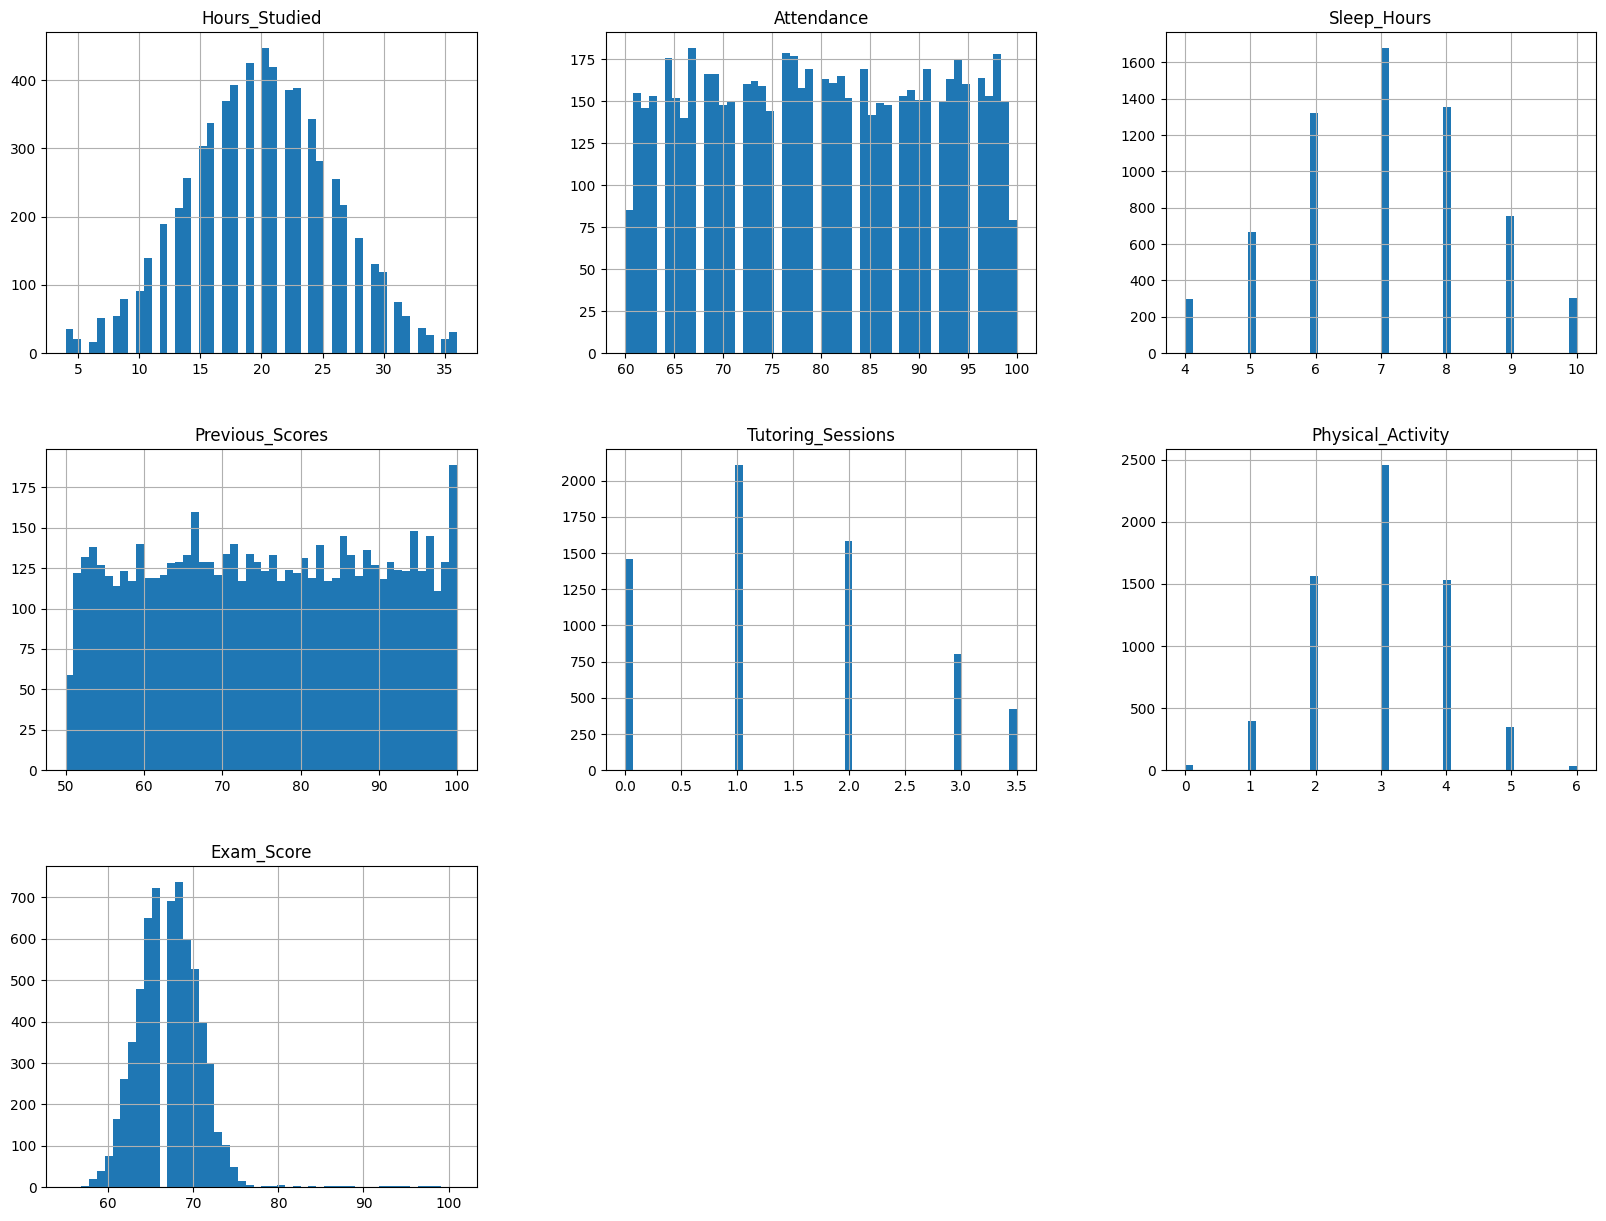

In [ ]:
StudentPerformanceFactors.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil histogram fitur target yaitu Exam_Score, kita bisa memperoleh informasi, antara lain:
* Sebagian besar siswa memiliki nilai di sekitar 65-70, dengan sedikit yang memiliki nilai lebih tinggi atau lebih rendah dari rentang ini. Distribusi relatif simetris dengan sedikit skewness ke kanan.

### **Exploratory Data Analysis - Multivariate Analysis**

#### **Categorical Features**

<ipython-input-29-57470ce5897c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=StudentPerformanceFactors, palette="Set3")
<ipython-input-29-57470ce5897c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=StudentPerformanceFactors, palette="Set3")
<ipython-input-29-57470ce5897c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, as

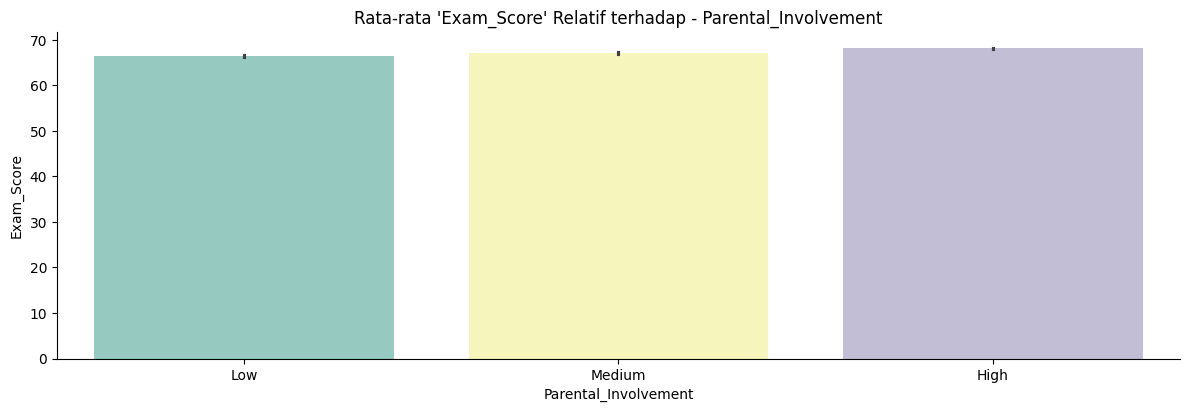

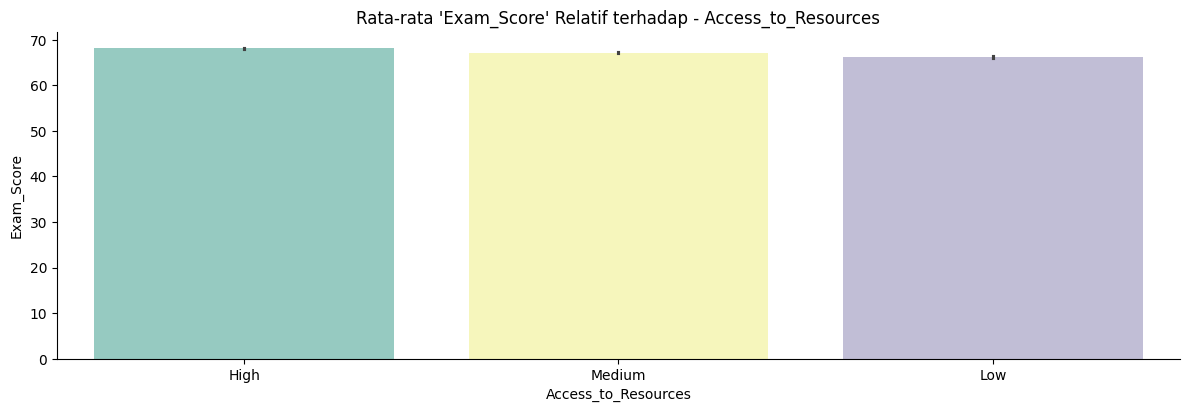

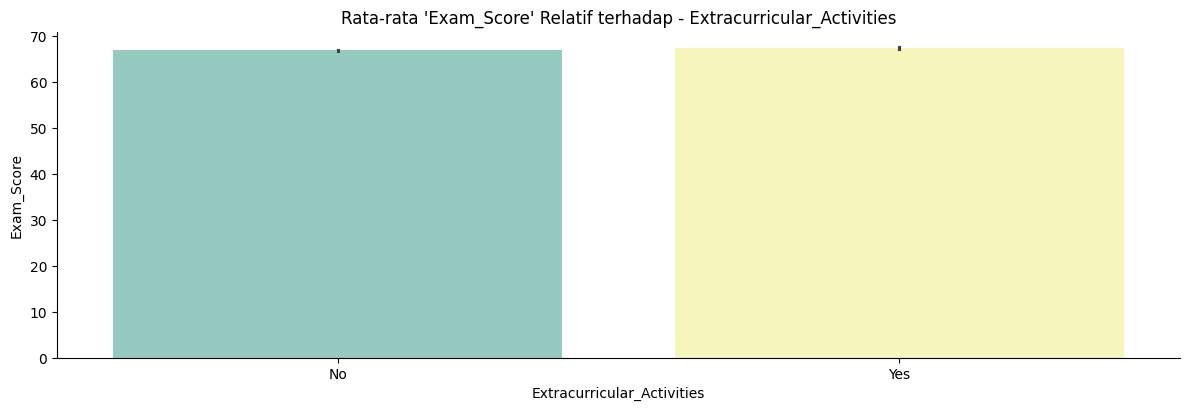

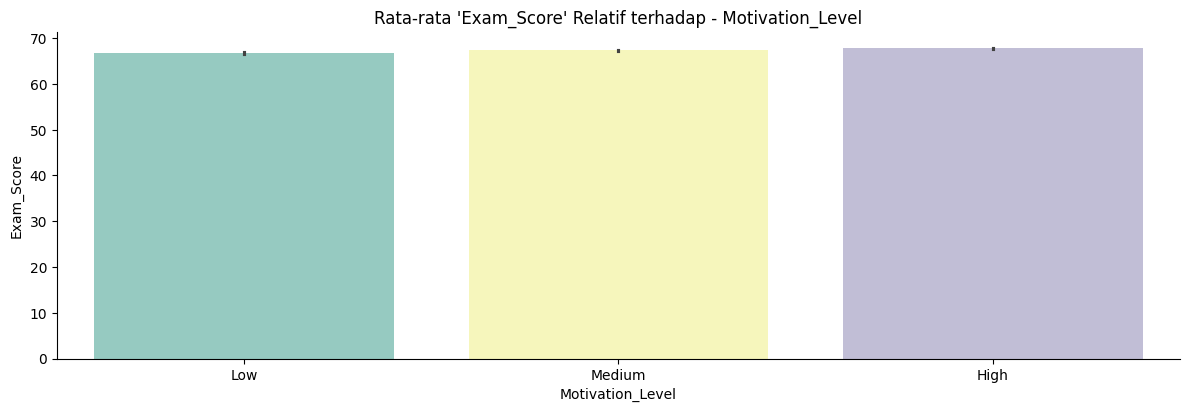

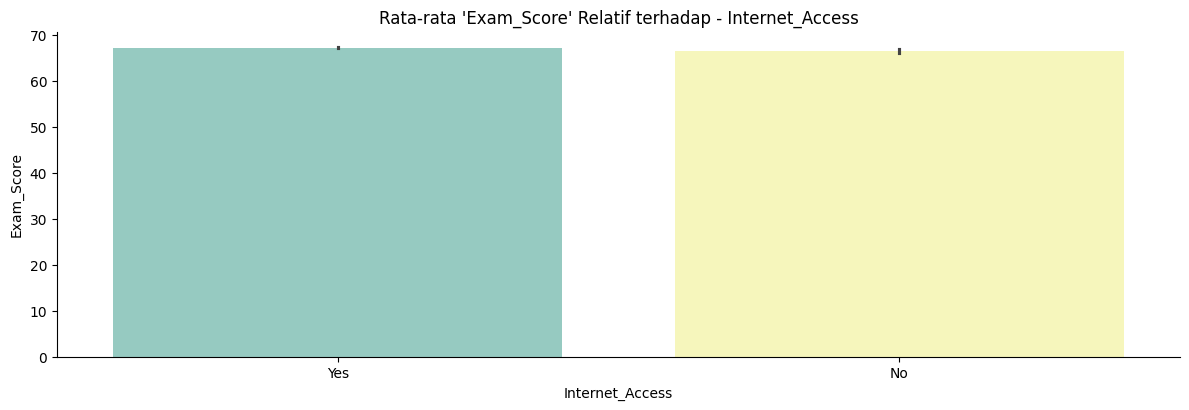

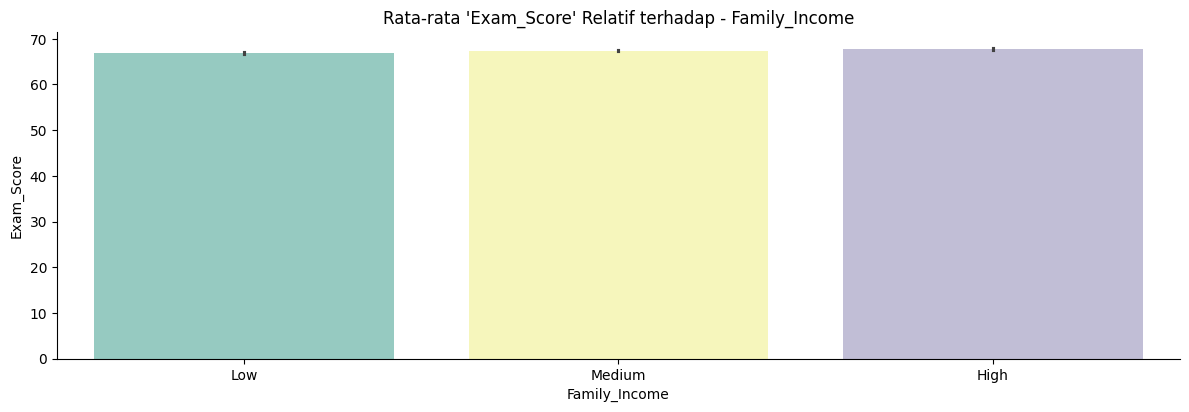

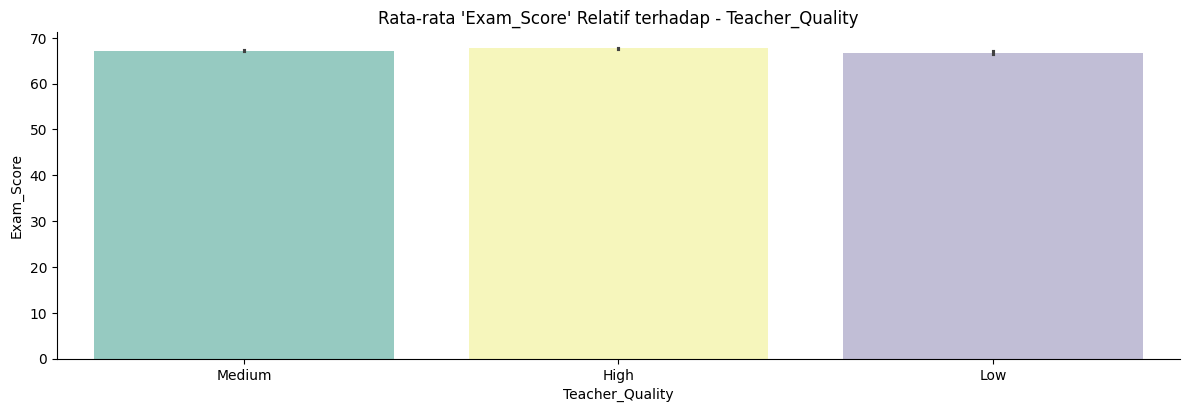

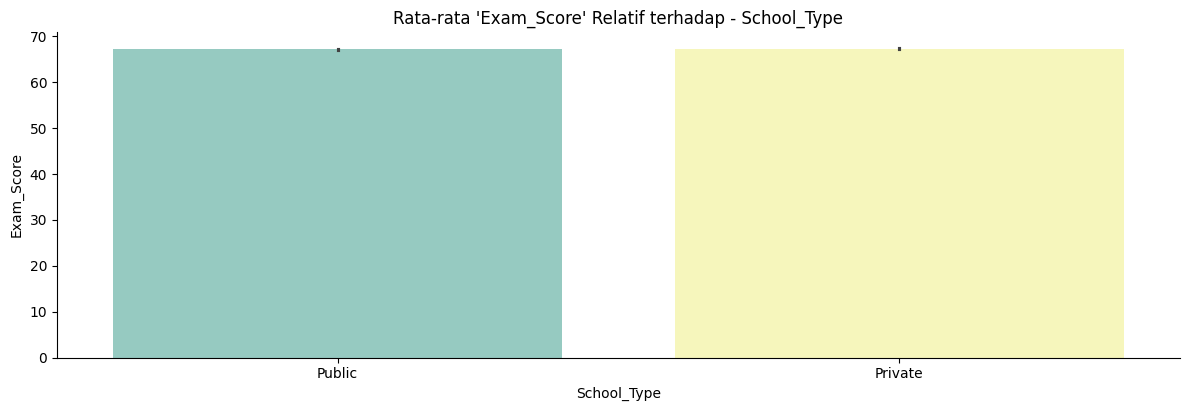

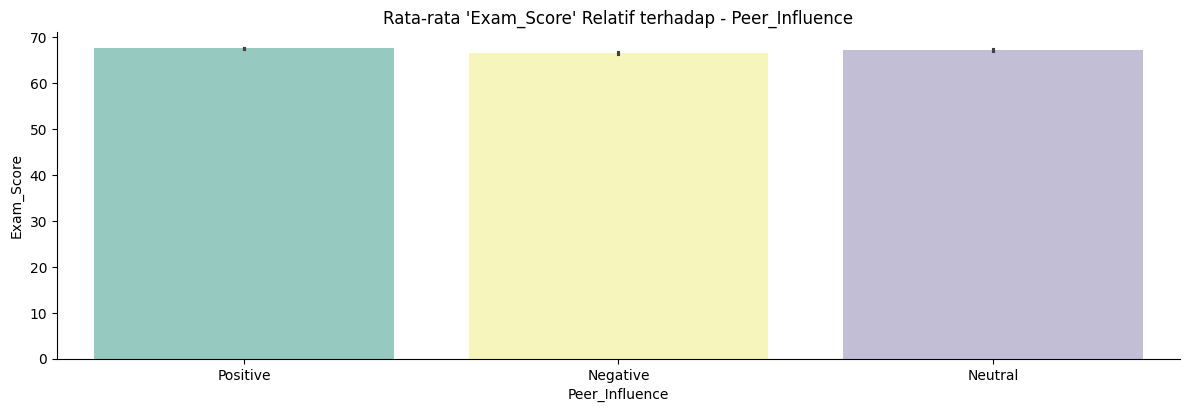

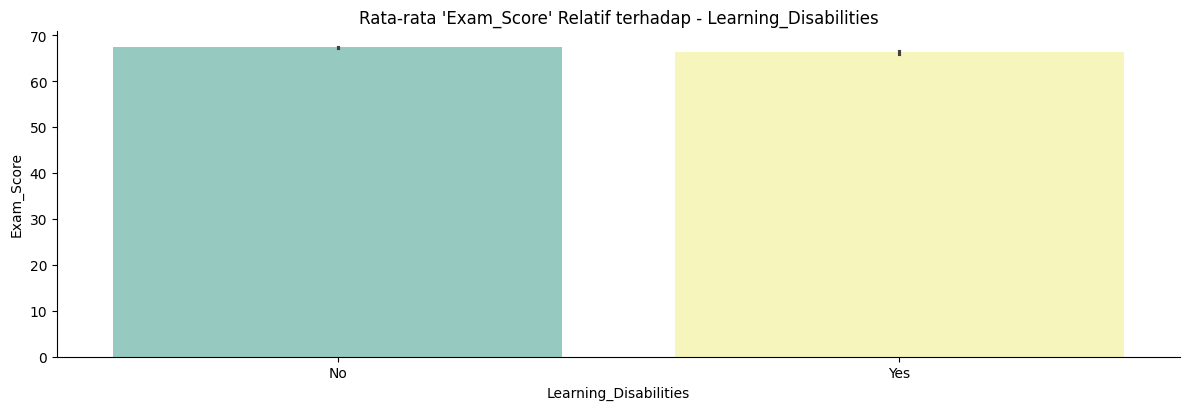

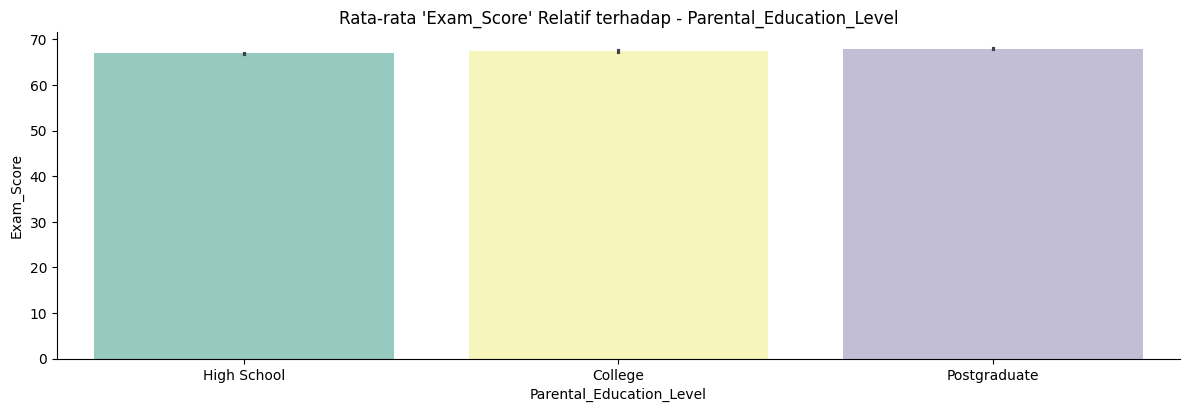

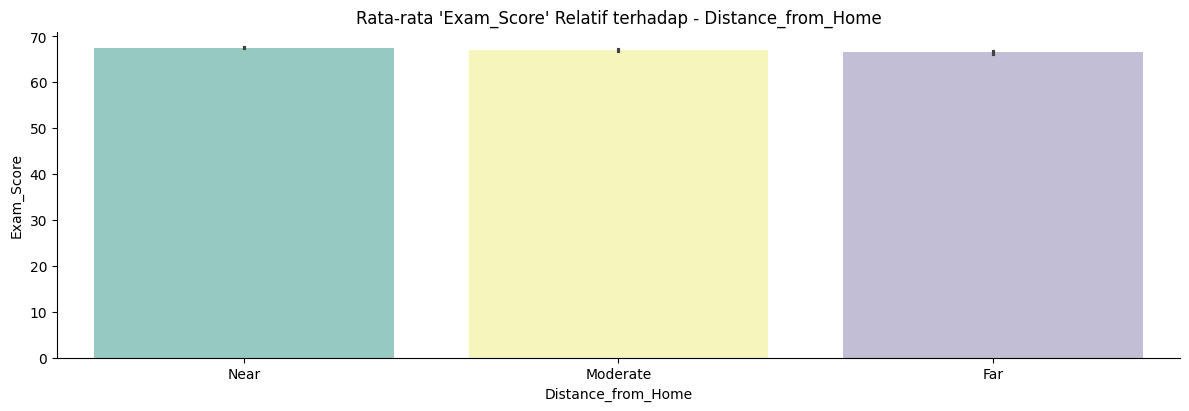

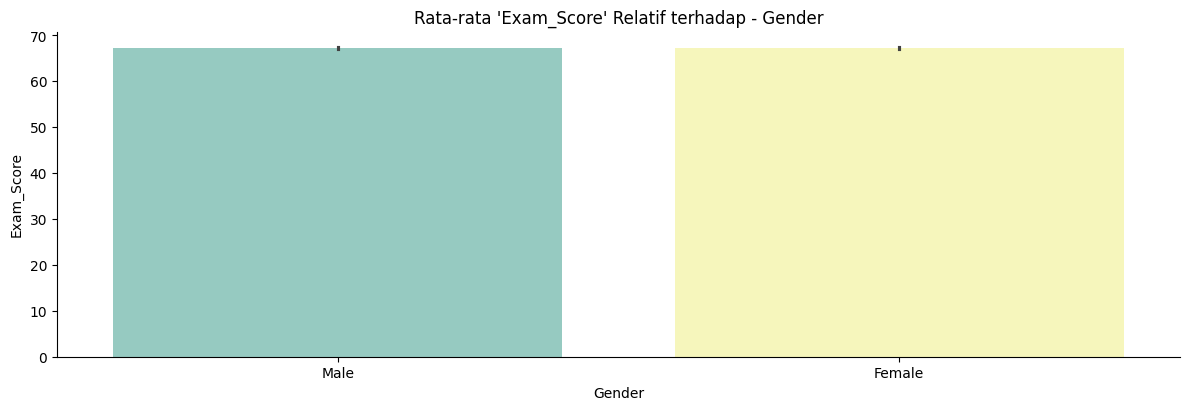

In [ ]:
cat_features = StudentPerformanceFactors.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Exam_Score", kind="bar", dodge=False, height = 4, aspect = 3,  data=StudentPerformanceFactors, palette="Set3")
  plt.title("Rata-rata 'Exam_Score' Relatif terhadap - {}".format(col))

Kesimpulan yang diperoleh menunjukkan bahwa rata-rata hasil ujian siswa adalah 70. Faktor-faktor yang memengaruhi nilai ujian meliputi Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, dan Access_to_Resources.

#### **Numerik Features**

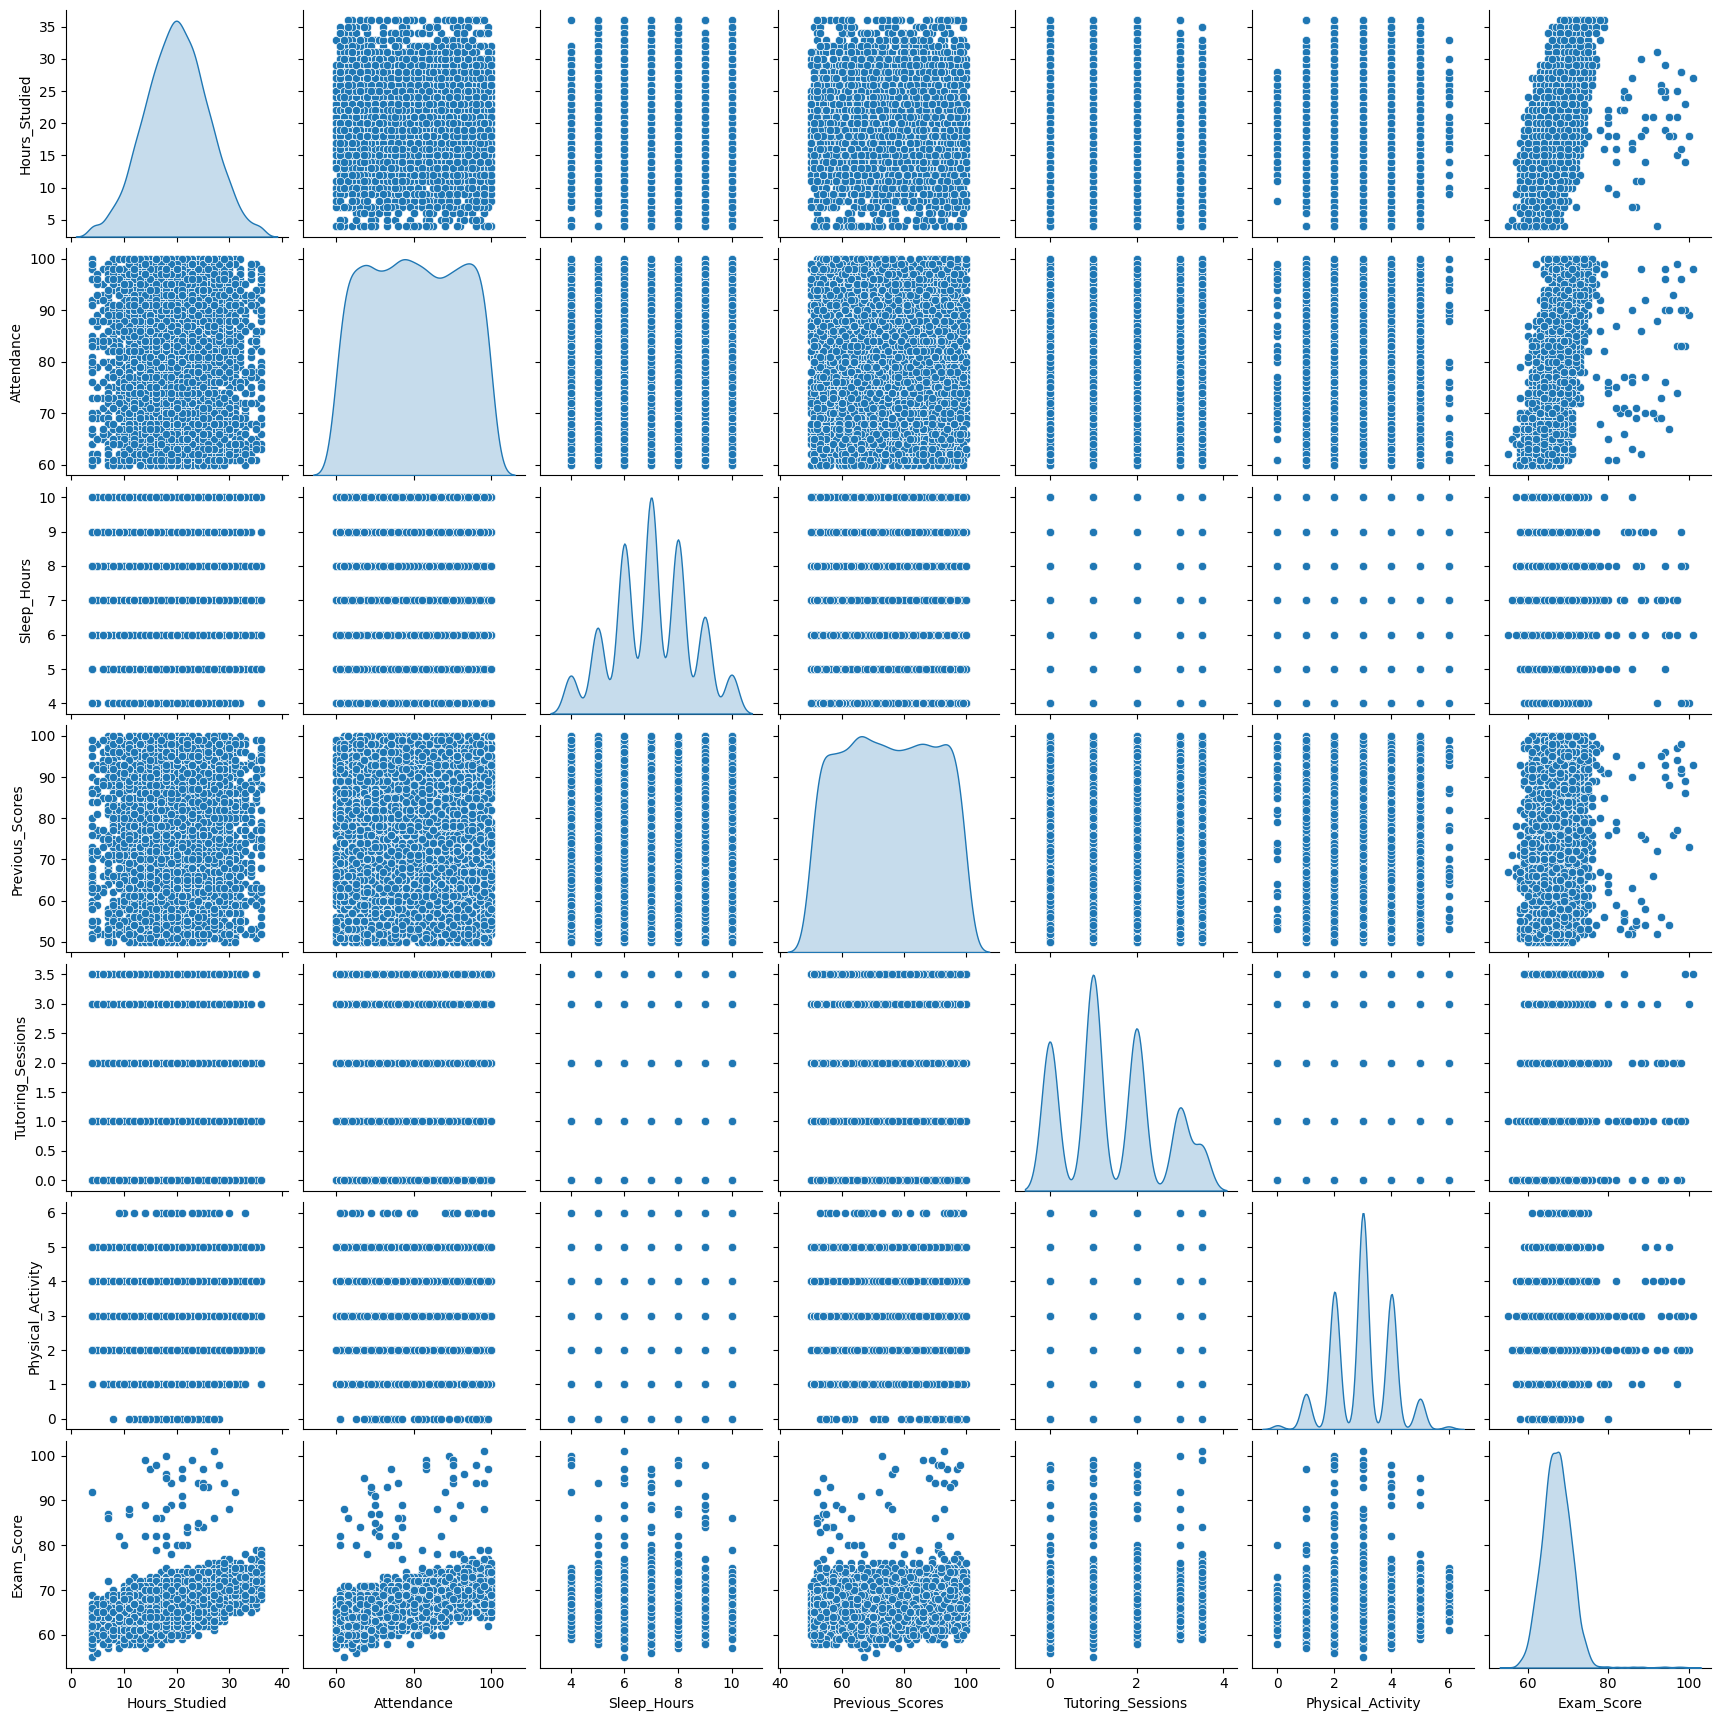

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(StudentPerformanceFactors, diag_kind = 'kde')

Dapat kita lihat pada fitur target (Exam_Score), fitur Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity menunjukkan pola acak yang berarti memiliki korelasi yang lemah.
Selanjutnya, mengecek korelasi antara fitur target dengan fitur numerik.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

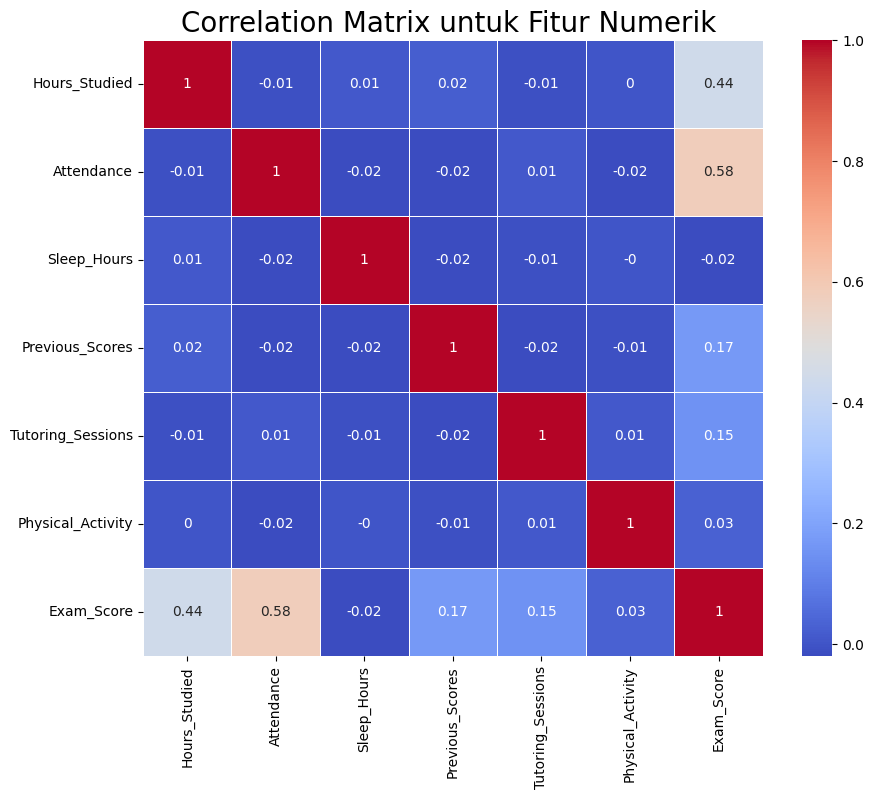

In [ ]:
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours',
                 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(10, 8))
correlation_matrix = StudentPerformanceFactors[numeric_columns].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan hasil analisis korelasi, fitur Hours_Studied dan Attendance memiliki skor korelasi yang cukup tinggi (di atas 0.44) terhadap Exam_Score, sehingga fitur-fitur tersebut dianggap memiliki hubungan yang signifikan. Sementara itu, fitur Sleep_Hours dan Physical_Activity memiliki skor korelasi yang sangat kecil, sehingga fitur-fitur tersebut dihapus dari dataset.

In [ ]:
StudentPerformanceFactors.drop(['Sleep_Hours', 'Physical_Activity'], inplace=True, axis=1)
StudentPerformanceFactors.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,73,Low,Yes,0.0,Low,Medium,Public,Positive,No,High School,Near,Male,67
1,19,64,Low,Medium,No,59,Low,Yes,2.0,Medium,Medium,Public,Negative,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,91,Medium,Yes,2.0,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,98,Medium,Yes,1.0,Medium,Medium,Public,Negative,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,65,Medium,Yes,3.0,Medium,High,Public,Neutral,No,College,Near,Female,70


# **Data Preparation**

Langkah berikutnya adalah tahap preprocessing data, yang mencakup pengecekan dan penanganan data duplikat serta penerapan feature engineering.

Tahap pertama dalam preprocessing adalah memeriksa keberadaan data duplikat.

In [ ]:
# Mengecek duplikasi data
duplikat = StudentPerformanceFactors.duplicated()

# Menampilkan jumlah data duplikat
print(f"Jumlah data duplikat: {duplikat.sum()}")

Jumlah data duplikat: 0


Dataset yang diambil dari Kaggle ini tergolong cukup bersih, sehingga tidak ditemukan data duplikat (jumlah duplikat = 0).

## Feature Encoding

Selanjutnya, dilakukan encoding pada fitur kategorikal. Encoding merupakan teknik untuk mengonversi data kategorikal menjadi bentuk numerik agar dapat diproses oleh mesin/komputer.

Metode Label Encoding digunakan dalam proses ini. Label Encoding mengubah kategori menjadi label numerik dan sesuai untuk variabel ordinal (kategori dengan tingkatan). Pada dataset yang digunakan, terdapat fitur kategorikal seperti "medium", "low", dan "high" yang memiliki hierarki ordinal, sehingga metode ini cocok untuk diterapkan.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset ke variabel baru untuk menghindari modifikasi dataset asli
df_encoded = StudentPerformanceFactors.copy()

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Lakukan label encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Hasil dataset setelah encoding
df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,73,1,1,0.0,1,2,1,2,0,1,2,1,67
1,19,64,1,2,0,59,1,1,2.0,2,2,1,0,0,0,1,0,61
2,24,98,2,2,1,91,2,1,2.0,2,2,1,1,0,2,2,1,74
3,29,89,1,2,1,98,2,1,1.0,2,2,1,0,0,1,1,1,71
4,19,92,2,2,1,65,2,1,3.0,2,0,1,1,0,0,2,0,70


Selanjutnya, distribusi fitur numerik dianalisis menggunakan fungsi describe().

In [ ]:
df_encoded.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.973346,80.020853,1.221856,1.204453,0.596896,75.066165,1.307306,0.923957,1.436736,1.209470,1.301192,0.695202,1.191753,0.104735,0.896676,1.496237,0.578238,67.252117
std,5.947598,11.550723,0.865149,0.870959,0.490560,14.400389,0.783201,0.265087,1.096792,0.742549,0.898870,0.460358,0.756394,0.306236,0.702926,0.670442,0.493880,3.914217
min,4.000000,60.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.000000,0.000000,0.000000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,75.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,67.000000
75%,24.000000,90.000000,2.000000,2.000000,1.000000,88.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1.000000,69.000000
max,36.000000,100.000000,2.000000,2.000000,1.000000,100.000000,2.000000,1.000000,3.500000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,101.000000


Berdasarkan hasil analisis deskriptif, terlihat bahwa fitur-fitur dalam dataset memiliki rentang skala yang berbeda. Oleh karena itu, dilakukan penyesuaian skala (scaling) agar rentang nilai setiap fitur menjadi seragam.

## Feature Scaling
Sebelum melakukan scaling, dataset dibagi menjadi data latih (training data) dan data uji (testing data) dengan rasio 80:20 untuk menghindari kebocoran data (data leakage).

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Setelah pemisahan dataset, dilakukan scaling pada fitur training dan testing menggunakan StandardScaler, yang menstandarisasi fitur dengan mean = 0 dan standar deviasi = 1. Metode ini cocok digunakan pada algoritma yang bergantung pada jarak (seperti SVM dan KNN) atau model linear.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling pada fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fitting hanya pada data training
X_test_scaled = scaler.transform(X_test)        # Transform data testing

## Principal Component Analysis

Tahapan selanjutnya adalah Principal Component Analysis (PCA). PCA mentransformasi fitur menjadi komponen utama yang saling tegak lurus (tidak berkorelasi) serta mempertahankan varians data sambil mengurangi dimensi.

Kode di bawah ini digunakan untuk mengecek multikolinearitas dengan *Variance Inflation Factor* (VIF). Proses ini dilakukan dengan menghitung VIF untuk mendeteksi korelasi antar-fitur. Jika terdapat multikolinearitas tinggi, maka dimensi dapat dikurangi menggunakan PCA.



In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 16.8 MB/s eta 0:00:00


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Hitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]

print("VIF sebelum PCA:")
print(vif_data)

VIF sebelum PCA:
                       feature       VIF
0                Hours_Studied  1.002484
1                   Attendance  1.003263
2         Parental_Involvement  1.002657
3          Access_to_Resources  1.003163
4   Extracurricular_Activities  1.002078
5              Previous_Scores  1.003737
6             Motivation_Level  1.003957
7              Internet_Access  1.002836
8            Tutoring_Sessions  1.002382
9                Family_Income  1.002305
10             Teacher_Quality  1.001922
11                 School_Type  1.002547
12              Peer_Influence  1.002662
13       Learning_Disabilities  1.003271
14    Parental_Education_Level  1.002681
15          Distance_from_Home  1.001740
16                      Gender  1.002289


Jika ada fitur dengan VIF > 10, dilakukan reduksi dimensi dengan PCA.

In [ ]:
from sklearn.decomposition import PCA

# Handle multikolinearitas dengan PCA jika VIF > 10
if any(vif_data["VIF"] > 10):
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    print(f"\nMenggunakan {pca.n_components_} komponen PCA.")
    print("Varians dipertahankan:", sum(pca.explained_variance_ratio_))
else:
    print("\nTidak ada multikolinearitas tinggi.")


Tidak ada multikolinearitas tinggi.


# **Modelling**  

Pada tahap ini, dilakukan pengembangan model *machine learning* menggunakan tiga algoritma yang berbeda. Selanjutnya, performa masing-masing algoritma dievaluasi untuk menentukan model yang memberikan hasil prediksi terbaik. Ketiga algoritma yang digunakan adalah sebagai berikut:  

- **Linear Regression**  
  Algoritma ini memiliki keunggulan dalam kecepatan dan kemudahan interpretasi, di mana koefisiennya dapat menunjukkan pengaruh fitur terhadap target. Selain itu, Linear Regression tidak rentan terhadap *overfitting* jika data memiliki hubungan linear yang kuat. Namun, algoritma ini memiliki keterbatasan dalam menangkap hubungan non-linear antar fitur serta sensitif terhadap *outlier* dan *multikolinearitas*.  

- **Decision Tree Regressor**  
  Berbeda dengan Linear Regression, algoritma ini mampu menangkap hubungan non-linear serta interaksi kompleks antar fitur tanpa memerlukan *scaling* data. Namun, Decision Tree Regressor memiliki kelemahan, yaitu rentan terhadap *overfitting* jika kedalaman pohon (*max_depth*) tidak dikontrol dengan baik. Selain itu, model ini kurang stabil karena perubahan kecil pada data dapat menyebabkan perubahan signifikan pada struktur pohon keputusan.  

- **Random Forest Regressor**  
  Algoritma ini merupakan kombinasi dari beberapa *decision tree* (*ensemble learning*), sehingga dapat mengurangi risiko *overfitting* yang terjadi pada *decision tree* tunggal. Selain itu, Random Forest Regressor lebih sta

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Gunakan data yang sudah di-scaling (atau PCA jika diperlukan)
# Jika menggunakan PCA, ganti X_train_scaled dengan X_train_pca dan X_test_scaled dengan X_test_pca

# Definisikan model-model yang akan digunakan
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Latih dan evaluasi setiap model
for name, model in models.items():
    # Training model
    model.fit(X_train_scaled, y_train)

    # Prediksi data training dan testing
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Hitung metrik evaluasi
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Simpan hasil
    results[name] = {
        "Train MAE": train_mae,
        "Train MSE": train_mse,
        "Test MAE": test_mae,
        "Test MSE": test_mse
    }

# Tampilkan hasil evaluasi
for model_name, metrics in results.items():
    print(f"=== {model_name} ===")
    print(f"Train MAE: {metrics['Train MAE']:.4f}")
    print(f"Train MSE: {metrics['Train MSE']:.4f}")

=== Linear Regression ===
Train MAE: 1.0910
Train MSE: 5.5161
=== Decision Tree ===
Train MAE: 0.0000
Train MSE: 0.0000
=== Random Forest ===
Train MAE: 0.4497
Train MSE: 0.8033


Penjelasan code diatas:


```
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}
```
Kode ini digunakan untuk mendefinisikan model-model yang akan digunakan. Parameter **random_state** pada Decision Tree dan Random Forest ditetapkan untuk memastikan reproduksibilitas hasil, sementara parameter lainnya dipertahankan sebagai nilai default.



```
results = {}
```
Selanjutnya, menyiapkan sebuah dictionary untuk menyimpan hasil evaluasi.

Setelah itu, melatih dan mengevaluasi ketiga algoritma machine learning, lalu menyimpan hasil evaluasinya ke dalam dictionary yang telah disiapkan sebelumnya.

Berdasarkan hasil evaluasi, dapat disimpulkan bahwa algoritma Random Forest menunjukkan performa terbaik dibandingkan dua algoritma lainnya. Sementara itu, Decision Tree teridentifikasi mengalami overfitting.

## Hyperparameter Tuning
Untuk meningkatkan kualitas model dari algoritma Random Forrest, perlu dilakukan hyperparameter tuning. Metode hyperparameter tuning yang akan digunakan adalah grid search. Grid search merupakan metode hyperparameter tuning yang mencoba semua kombinasi hyperparameter yang telah ditentukan dan mengevaluasi performa model untuk setiap kombinasi tersebut. Hasil akhirnya akan memilih kombinasi hyperparameter terbaik.

Evaluasi model pada tahapan gridsearch menggunakan cross-validation agar model robust.

Langkah pertama yang dilakukan mendefinisikan kombinasi hyperparameter.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],      # Coba jumlah pohon lebih besar
    'max_depth': [None, 10, 15, 20],      # Batasi kedalaman untuk hindari overfitting
    'min_samples_split': [2, 5, 10],      # Kontrol splitting node
    'max_features': ['sqrt', 0.5, 0.8]    # Cakupan fitur untuk split
}

Selanjutnya mengimplementasi GridSearchCV dengan cross-validaion

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Inisialisasi model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Fokus minimalkan MSE
    n_jobs=-1,                      # Gunakan semua core CPU
    verbose=2                       # Tampilkan progress
)

# Fit pada data training yang sudah di-scaling
grid_search.fit(X_train_scaled, y_train)

# Ambil model terbaik
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Hasil dari GridSearch parameter terbaik adalah di bawah ini

In [ ]:
print(best_rf)

RandomForestRegressor(max_depth=15, max_features=0.5, min_samples_split=5,
                      n_estimators=300, random_state=42)


In [ ]:
# Prediksi data training
y_train_pred = best_rf.predict(X_train_scaled)

# Hitung MAE dan MSE untuk data training
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Tampilkan hasil
print(f"=== Random Forrest ===")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")

=== Random Forrest ===
Train MAE: 0.5625
Train MSE: 1.7246


Jika kita perhatikan kembali, hasil model yang diperoleh dari proses hyperparameter tuning menunjukkan peningkatan nilai MAE dan MSE dibandingkan sebelum dilakukan tuning. Berikut perbandingannya:

**Sebelum Tuning**

=== Random Forest ===

Train MAE: 0.4497

Train MSE: 0.8033

**Setelah Tuning**

=== Random Forrest ===

Train MAE: 0.5625

Train MSE: 1.7246

Hal ini umum terjadi dalam proses hyperparameter tuning.

# **Evaluation**

Metrik yang akan digunakan pada prediksi ini adalah MAE dan MSE. Berikut adalah penjelasan tiap metrik yang digunakan:

* Mean Absolute Error (MAE)

  MAE adalah salah satu metode evaluasi yang umum digunakan dalam data science. MAE menghitung rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual.

  Dengan kata lain, MAE menghitung berapa rata-rata kesalahan absolut dalam prediksi. Semakin kecil nilai MAE, semakin baik kualitas model tersebut.

  Rumus MAE:

  $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
  $$

Di mana:
- $n$ adalah jumlah sampel  
- $y_i$ adalah nilai aktual  
- $\hat{y_i}$ adalah nilai prediksi


  * Mean Squared Error (MSE)

  MSE adalah metode evaluasi lain yang digunakan dalam data science. MSE menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual.

  Dengan kata lain, MSE menghitung berapa rata-rata kesalahan kuadrat dalam prediksi. Semakin kecil nilai MSE, semakin baik kualitas model tersebut.

  Rumus MSE:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Di mana:
- $n$ adalah jumlah sampel  
- $y_i$ adalah nilai aktual  
- $\hat{y_i}$ adalah nilai prediksi

Hasil evaluasi pada dataset training dan testing adalah sebagai berikut:

In [ ]:
for model_name, metrics in results.items():
    print(f"=== {model_name} ===")
    print(f"Train MAE: {metrics['Train MAE']:.4f}")
    print(f"Train MSE: {metrics['Train MSE']:.4f}")
    print(f"Test MAE: {metrics['Test MAE']:.4f}")
    print(f"Test MSE: {metrics['Test MSE']:.4f}\n")

=== Linear Regression ===
Train MAE: 1.0910
Train MSE: 5.5161
Test MAE: 1.0869
Test MSE: 5.2402

=== Decision Tree ===
Train MAE: 0.0000
Train MSE: 0.0000
Test MAE: 1.8519
Test MSE: 13.8315

=== Random Forest ===
Train MAE: 0.4497
Train MSE: 0.8033
Test MAE: 1.1835
Test MSE: 5.7330



Untuk memudahkan mari buat plot metrik tersebut dengan bar chart.

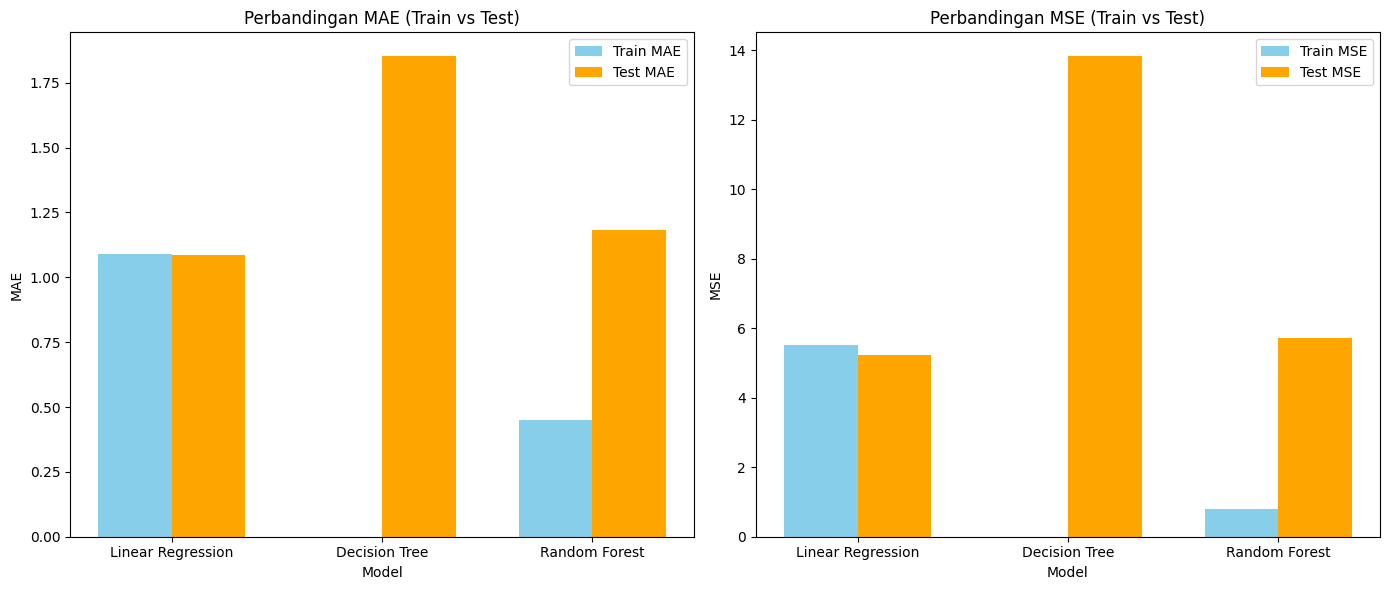

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data hasil evaluasi
models = list(results.keys())
train_mae = [results[model]['Train MAE'] for model in models]
train_mse = [results[model]['Train MSE'] for model in models]
test_mae = [results[model]['Test MAE'] for model in models]
test_mse = [results[model]['Test MSE'] for model in models]

# Plot MAE
x = np.arange(len(models))  # Posisi x untuk model
width = 0.35  # Lebar bar

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Train dan Test MAE
ax[0].bar(x - width/2, train_mae, width, label='Train MAE', color='skyblue')
ax[0].bar(x + width/2, test_mae, width, label='Test MAE', color='orange')
ax[0].set_title('Perbandingan MAE (Train vs Test)')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAE')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()

# Plot Train dan Test MSE
ax[1].bar(x - width/2, train_mse, width, label='Train MSE', color='skyblue')
ax[1].bar(x + width/2, test_mse, width, label='Test MSE', color='orange')
ax[1].set_title('Perbandingan MSE (Train vs Test)')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MSE')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()

plt.tight_layout()
plt.show()

Dapat dilihat dari hasil visualisasi di atas bahwa algoritma Linear Regression merupakan model terbaik dibandingkan dengan algoritma lainnya. Linear Regression menunjukkan performa yang baik pada data test dan train, yang mengindikasikan bahwa model ini good fit. Sementara itu, kedua algoritma lainnya mengalami overfit.